In [1]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import pickle
import os

# Paths (update as needed)
TRANSFORMED_PATH = "../../data/processed/transformed/X_train_transform_scaled.csv"
NO_TRANSFORMED_PATH = "../../data/processed/no_transformed/X_train_no_transform_scaled.csv"
TRANSFORMED_LABEL_PATH = "../../data/processed/transformed/y_train_transform.csv"
NO_TRANSFORMED_LABEL_PATH = "../../data/processed/no_transformed/y_train_no_transform.csv"
TRANSFORMED_OUTPUT_DIR = "../../data/processed/transformed"
NO_TRANSFORMED_OUTPUT_DIR = "../../data/processed/no_transformed"

# Load data
X_train_transformed = pd.read_csv(TRANSFORMED_PATH)
X_train_no_transformed = pd.read_csv(NO_TRANSFORMED_PATH)
y_train_transformed = pd.read_csv(TRANSFORMED_LABEL_PATH).squeeze()  # Assuming single column
y_train_no_transformed = pd.read_csv(NO_TRANSFORMED_LABEL_PATH).squeeze()  # Assuming single column

# Apply SMOTE to both datasets
smote = SMOTE(random_state=42)

X_resampled_trans, y_resampled_trans = smote.fit_resample(X_train_transformed, y_train_transformed)
X_resampled_no_trans, y_resampled_no_trans = smote.fit_resample(X_train_no_transformed, y_train_no_transformed)

# Save resampled datasets
os.makedirs(TRANSFORMED_OUTPUT_DIR, exist_ok=True)
os.makedirs(NO_TRANSFORMED_OUTPUT_DIR, exist_ok=True)
X_resampled_trans.to_csv(os.path.join(TRANSFORMED_OUTPUT_DIR, "X_train_transform_scaled_resampled.csv"), index=False)
y_resampled_trans.to_csv(os.path.join(TRANSFORMED_OUTPUT_DIR, "y_train_transform_scaled_resampled.csv"), index=False)

X_resampled_no_trans.to_csv(os.path.join(NO_TRANSFORMED_OUTPUT_DIR, "X_train_no_transform_scaled_resampled.csv"), index=False)
y_resampled_no_trans.to_csv(os.path.join(NO_TRANSFORMED_OUTPUT_DIR, "y_train_no_transform_scaled_resampled.csv"), index=False)

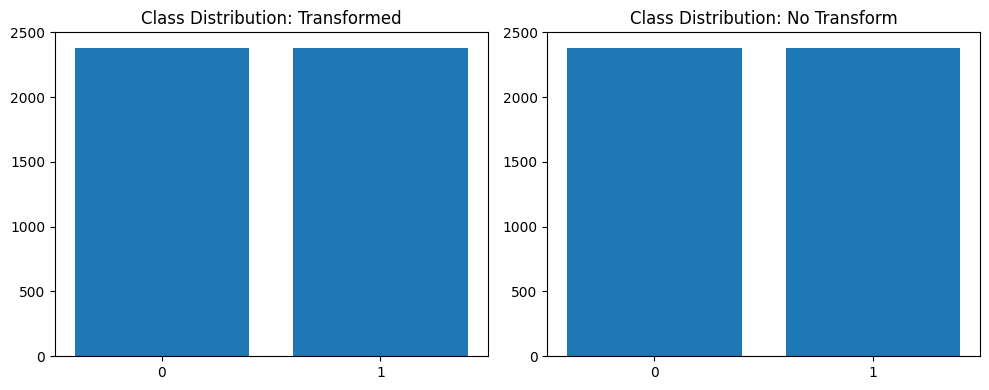

In [2]:
import matplotlib.pyplot as plt
from collections import Counter

# Visualize class distribution
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].bar(Counter(y_resampled_trans).keys(), Counter(y_resampled_trans).values())
ax[0].set_title("Class Distribution: Transformed")
ax[0].set_xticks([0, 1])
ax[1].bar(Counter(y_resampled_no_trans).keys(), Counter(y_resampled_no_trans).values())
ax[1].set_title("Class Distribution: No Transform")
ax[1].set_xticks([0, 1])
plt.tight_layout()
